In [1]:
import ha
import matplotlib.pyplot as plt 
import random
import math
import copy

In [444]:
import copy

def ffd(w, h, W, p):
    """
    直接摆在距离偏好位置最近的点
    w:list of width
    h:list of height
    W:width
    p:偏好位置
    """
    n = len(w)    # 箱子总数
    ans = [[0, 0, 0, 0, 0]]      # 保存[[xi,yi,wi,hi],...]    需要排好序,以yi排序升序
    for i in range(n):
        # 开始安排第i个箱子
        tmp_h = h[i]
        tmp_w = w[i]
        tmp_p = p[i]
        tmp_intervals, tmp_y= find_position(ans,tmp_w,tmp_h,W)
        # tmp_intervals为可用的区间，下面决定三种不同的策略
        # 先考虑放在最近的点
        tmp_x = tmp_intervals[0][0]
        for j in tmp_intervals:
            if p[i] >= j[0] and p[i] <= j[1]:
                tmp_x = p[i]
                break
            elif abs(tmp_x - p[i]) > abs(j[0] - p[i]):
                tmp_x = j[0]
            elif abs(tmp_x - p[i]) > abs(j[1] - p[i]):
                tmp_x = j[1]
        tmp_ans = [tmp_x, tmp_y, tmp_w, tmp_h, tmp_p, i]
        for k in range(len(ans)):
            if ans[k][1] + ans[k][3] > tmp_y + tmp_h:
                ans = ans[:k] + [tmp_ans] + ans[k:]
                break
        if len(ans) != i + 2:
            ans.append(tmp_ans)
    return ans
        
def ffdtwo(w, h, W, p):
    """
    策略2
    直接摆在距离偏好位置最近的边缘点
    w:list of width
    h:list of height
    W:width
    p:偏好位置
    """
    n = len(w)    # 箱子总数
    ans = [[0, 0, 0, 0, 0]]      # 保存[[xi,yi,wi,hi],...]    需要排好序,以yi排序升序
    for i in range(n):
        # 开始安排第i个箱子
        tmp_h = h[i]
        tmp_w = w[i]
        tmp_p = p[i]
        tmp_intervals, tmp_y= find_position(ans,tmp_w,tmp_h,W)
        # tmp_intervals为可用的区间，下面决定三种不同的策略
        # 考虑放在最近的边缘点
        tmp_x = tmp_intervals[0][0]
        for j in tmp_intervals:
            # if p[i] >= j[0] and p[i] <= j[1]:
            #     tmp_x = p[i]
            #     break
            if abs(tmp_x - p[i]) > abs(j[0] - p[i]):
                tmp_x = j[0]
            elif abs(tmp_x - p[i]) > abs(j[1] - p[i]):
                tmp_x = j[1]
        tmp_ans = [tmp_x, tmp_y, tmp_w, tmp_h, tmp_p, i]
        for k in range(len(ans)):
            if ans[k][1] + ans[k][3] > tmp_y + tmp_h:
                ans = ans[:k] + [tmp_ans] + ans[k:]
                break
        if len(ans) != i + 2:
            ans.append(tmp_ans)
    return ans

def ffdthree(w, h, W, p):
    """
    策略3
    直接摆在距离偏好位置最近的最边缘点
    w:list of width
    h:list of height
    W:width
    p:偏好位置
    """
    n = len(w)    # 箱子总数
    ans = [[0, 0, 0, 0, 0]]      # 保存[[xi,yi,wi,hi],...]    需要排好序,以yi排序升序
    for i in range(n):
        # 开始安排第i个箱子
        tmp_h = h[i]
        tmp_w = w[i]
        tmp_p = p[i]
        tmp_intervals, tmp_y= find_position(ans,tmp_w,tmp_h,W)
        # tmp_intervals为可用的区间，下面决定三种不同的策略
        # 考虑放在最近的边缘点
        tmp_x = tmp_intervals[0][0]
        if abs(tmp_intervals[0][0] - p[i]) >= abs(tmp_intervals[-1][1] - p[i]):
            tmp_x = tmp_intervals[-1][1]
        tmp_ans = [tmp_x, tmp_y, tmp_w, tmp_h, tmp_p]
        for k in range(len(ans)):
            if ans[k][1] + ans[k][3] > tmp_y + tmp_h:
                ans = ans[:k] + [tmp_ans] + ans[k:]
                break
        if len(ans) != i + 2:
            ans.append(tmp_ans)
    return ans

def ffd_beamsearch(w, h, W, p, alpha):
    """
    带有beam_search版本的启发式算法，从三个里面选？
    w:list of width
    h:list of height
    W:width
    p:偏好位置
    """
    n = len(w)    # 箱子总数
    # beam_ans = []
    ans = [[0, 0, 0, 0, 0, 0]]      # 保存[[xi,yi,wi,hi],...]    需要排好序,以yi排序升序 第一个最后一位保存一个打分函数
    beam_ans = [ans]
    for i in range(n):
        # 开始安排第i个箱子
        tmp_h = h[i]
        tmp_w = w[i]
        tmp_p = p[i]
        tmp_beam_ans = []
        for tmp_ans in beam_ans:
            # 除了改变tmp_ans，还需要新加几个
            tmp_intervals, tmp_y= find_position(tmp_ans,tmp_w,tmp_h,W)
            # tmp_intervals为可用的区间，下面决定三种不同的策略
            # 先考虑放在最近的点
            tmp_xx = set()  #将tmp_x保存在这里面
            tmp_x = tmp_intervals[0][0]
            for j in tmp_intervals:
                if p[i] >= j[0] and p[i] <= j[1]:
                    tmp_x = p[i]
                    break
                elif abs(tmp_x - p[i]) > abs(j[0] - p[i]):
                    tmp_x = j[0]
                elif abs(tmp_x - p[i]) > abs(j[1] - p[i]):
                    tmp_x = j[1]
            tmp_xx.add(tmp_x)
            # 第二种
            tmp_x = tmp_intervals[0][0]
            for j in tmp_intervals:
            # if p[i] >= j[0] and p[i] <= j[1]:
            #     tmp_x = p[i]
            #     break
                if abs(tmp_x - p[i]) > abs(j[0] - p[i]):
                    tmp_x = j[0]
                elif abs(tmp_x - p[i]) > abs(j[1] - p[i]):
                    tmp_x = j[1]
            tmp_xx.add(tmp_x)
            # 第三种
            tmp_x = tmp_intervals[0][0]
            if abs(tmp_intervals[0][0] - p[i]) >= abs(tmp_intervals[-1][1] - p[i]):
                tmp_x = tmp_intervals[-1][1]
            tmp_xx.add(tmp_x)
            # 此时tmp_xx中保存的是可能的x坐标
            for tmp_x in tmp_xx:
                # 对三种分别进行添加
                ttmp_ans = [tmp_x, tmp_y, tmp_w, tmp_h, tmp_p]
                tmpppp_ans = copy.deepcopy(tmp_ans)
                for k in range(len(tmpppp_ans)):
                    if tmpppp_ans[k][1] + tmpppp_ans[k][3] > tmp_y + tmp_h:
                        tmpppp_ans = tmpppp_ans[:k] + [ttmp_ans] + tmpppp_ans[k:]
                        break
                if len(tmpppp_ans) != i + 2:
                    tmpppp_ans.append(ttmp_ans)
                tmpppp_ans[0][5] += abs(tmp_x - tmp_p)
                tmp_beam_ans.append(tmpppp_ans)
        # tmp_beam_ans中取出前k个s
        tmp_beam_ans.sort(key = lambda x : alpha * x[0][-1] + x[-1][1] + x[-1][3])
        beam_ans = tmp_beam_ans[:10]
    return beam_ans[0]

def find_position(p, w, h, W):
    '''
    从已经存放好的箱子中找出可存放的位置
    p: 之前已经存好的位置信息.list of [x,y,w,h]
    w: 该箱子的width
    h: 该箱子的height
    输出区间的集合[[a,b],[c,d]]
    '''
    # 先找出在y[i],y[i] + h 中有重合的箱子
    for i in range(len(p)):
        y_start = p[i][1] + p[i][3]
        y_end = y_start + h
        # 在区间[y_start, y_end]中找有重合的箱子
        tmp_intervals = []
        for j in range(len(p)):
            if p[j][1] >= y_end or p[j][1] + p[j][3] <= y_start:
                continue
            else:
                # 有交集
                tmp_intervals.append([p[j][0],p[j][0] + p[j][2]])
        # 合并区间tmp_intervals
        if tmp_intervals == []:
            return ([[0, W - w]],y_start)
        final_intervals = merge(tmp_intervals)
        # [[],[]]
        intervals = []
        tmp = 0
        for i in final_intervals:
            if i[0] - tmp >= w:
                intervals.append([tmp, i[0] - w])
            tmp = i[1]
        if W - tmp >= w:
            intervals.append([tmp, W - w])
        if len(intervals) > 0:
            return (intervals, y_start)


def merge(intervals):
    """
    合并区间
    """
    res = []
    intervals.sort(key = lambda x : x[0])
    tmp = intervals[0]
    for i in intervals:
        if i[0] > tmp[1]:
            res.append(tmp)
            tmp = i
        else:
            tmp[1] = max(tmp[1], i[1])
    res.append(tmp)
    return res   


In [57]:
def sketch_map(W, w, h, x, y, p, number, name):
    """
    画结果示意图
    W: 容器的宽度
    w: 数组，为每个箱子的宽度
    h: 数组，为每个箱子的高度
    p: 数组，为每个箱子的偏好位置
    x: 数组，为每个箱子左下角x坐标
    y: 数组，为每个箱子左下角y坐标
    name: str，图片保存名字
    """
    # 先确定x,y轴范围
    y_label_range = 1.6 * max([i + j for i, j in zip(y, h)])
    x_label_range = W
    
    # 开始做图
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    #建立矩形
    for i in range(len(w)):
        if x[i] == p[i]:
            c = 'red'
            l = 2
        else:
            c = 'black'
            l = 1
        rect = plt.Rectangle(
                (x[i], y[i]),  # (x,y)矩形左下角
                w[i],          # width长
                h[i],          # height宽
                fill=False,
                              edgecolor=c, linewidth=l, 
                alpha=0.5)
        ax.add_patch(rect)
        ax.text((2 * x[i] + w[i])/2 - 1, (2 * y[i] + h[i])/2 - 1,
                str(number[i]) +':' + str(int(abs(x[i]-p[i]))),
                bbox=dict(facecolor='blue', alpha=0),
                fontsize=14, color='black')
    # 建立图
    plt.xlim(0, x_label_range)
    plt.ylim(0, y_label_range)
    plt.show()
    plt.savefig(name + ".png")

In [386]:
def ffd_withswap(w,h,W,p,alpha):
    # 先做一遍逆序
    ans = math.inf
    best_result = []
    best_order_w = copy.deepcopy(w)
    best_order_h = copy.deepcopy(h)
    best_order_p = copy.deepcopy(p)
    n = len(w)
    for i in range(n):
        for j in range(n):
            h[i], h[j] = h[j], h[i]
            w[i], w[j] = w[j], w[i]
            p[i], p[j] = p[j], p[i]
            tmp_result = ha.ffd(w,h,W,p)
            tmp_ans = tmp_result[-1][1] + tmp_result[-1][3]
            for k in tmp_result:
                tmp_ans += alpha * abs(k[0] - k[4])
            ans = min(tmp_ans, ans)
            if ans == tmp_ans:
                best_result = copy.deepcopy(tmp_result)
                best_order_w = copy.deepcopy(w)
                best_order_h = copy.deepcopy(h)
                best_order_p = copy.deepcopy(p)
        w = copy.deepcopy(best_order_w)
        h = copy.deepcopy(best_order_h)
        p = copy.deepcopy(best_order_p)
    print(ans)
    if alpha != 0:
        print((ans - (best_result[-1][1] + best_result[-1][3]))/alpha)
    if alpha == 0:
        punish = 0
        for i in best_result:
            punish += abs(i[0] - i[4])
        print(punish)
    return # best_result

In [387]:
def ffdtwo_withswap(w,h,W,p,alpha):
    # 先做一遍逆序
    ans = math.inf
    best_result = []
    best_order_w = copy.deepcopy(w)
    best_order_h = copy.deepcopy(h)
    best_order_p = copy.deepcopy(p)
    n = len(w)
    for i in range(n):
        for j in range(n):
            h[i], h[j] = h[j], h[i]
            w[i], w[j] = w[j], w[i]
            p[i], p[j] = p[j], p[i]
            tmp_result = ha.ffdtwo(w,h,W,p)
            tmp_ans = tmp_result[-1][1] + tmp_result[-1][3]
            for k in tmp_result:
                tmp_ans += alpha * abs(k[0] - k[4])
            ans = min(tmp_ans, ans)
            if ans == tmp_ans:
                best_result = copy.deepcopy(tmp_result)
                best_order_w = copy.deepcopy(w)
                best_order_h = copy.deepcopy(h)
                best_order_p = copy.deepcopy(p)
        w = copy.deepcopy(best_order_w)
        h = copy.deepcopy(best_order_h)
        p = copy.deepcopy(best_order_p)
    print(ans)
    if alpha != 0:
        print((ans - (best_result[-1][1] + best_result[-1][3]))/alpha)
    if alpha == 0:
        punish = 0
        for i in best_result:
            punish += abs(i[0] - i[4])
        print(punish)
    return #best_result

In [398]:
def ffdthree_withswap(w,h,W,p,alpha):
    # 先做一遍逆序
    ans = math.inf
    best_result = []
    best_order_w = copy.deepcopy(w)
    best_order_h = copy.deepcopy(h)
    best_order_p = copy.deepcopy(p)
    n = len(w)
    for i in range(n):
        for j in range(n):
            h[i], h[j] = h[j], h[i]
            w[i], w[j] = w[j], w[i]
            p[i], p[j] = p[j], p[i]
            tmp_result = ha.ffdthree(w,h,W,p)
            tmp_ans = tmp_result[-1][1] + tmp_result[-1][3]
            for k in tmp_result:
                tmp_ans += alpha * abs(k[0] - k[4])
            ans = min(tmp_ans, ans)
            if ans == tmp_ans:
                best_result = copy.deepcopy(tmp_result)
                best_order_w = copy.deepcopy(w)
                best_order_h = copy.deepcopy(h)
                best_order_p = copy.deepcopy(p)
        w = copy.deepcopy(best_order_w)
        h = copy.deepcopy(best_order_h)
        p = copy.deepcopy(best_order_p)
    print(ans)
    if alpha != 0:
        print((ans - (best_result[-1][1] + best_result[-1][3]))/alpha)
    if alpha == 0:
        punish = 0
        for i in best_result:
            punish += abs(i[0] - i[4])
        print(punish)
    return #best_result

In [388]:
def ffd_beamsearch_withswap(w,h,W,p,alpha):
    # 先做一遍逆序
    ans = math.inf
    best_result = []
    best_order_w = copy.deepcopy(w)
    best_order_h = copy.deepcopy(h)
    best_order_p = copy.deepcopy(p)
    n = len(w)
    for i in range(n):
        for j in range(n):
            h[i], h[j] = h[j], h[i]
            w[i], w[j] = w[j], w[i]
            p[i], p[j] = p[j], p[i]
            tmp_result = ha.ffd_beamsearch(w,h,W,p,alpha)
            tmp_ans = tmp_result[-1][1] + tmp_result[-1][3]
            tmp_ans += alpha * tmp_result[0][5]
            ans = min(tmp_ans, ans)
            if ans == tmp_ans:
                best_result = copy.deepcopy(tmp_result)
                best_order_w = copy.deepcopy(w)
                best_order_h = copy.deepcopy(h)
                best_order_p = copy.deepcopy(p)
        w = copy.deepcopy(best_order_w)
        h = copy.deepcopy(best_order_h)
        p = copy.deepcopy(best_order_p)
    print(ans)
    if alpha != 0:
        print((ans - (best_result[-1][1] + best_result[-1][3]))/alpha)
    elif alpha == 0:
        print(best_result[0][5])
    return # best_result

In [152]:
a = [1,3]
a[0],a[1] = a[1],a[0]
a

[3, 1]

In [403]:
n = 30
w = {}
h = {}
p = {}
n_small = n // 3
n_mid = n //3
n_large = n - n_small - n_mid
tmp_w = []
tmp_h = []
for i in range(1, n_small + 1):
    tmp_w.append(random.randint(1, 3))
    tmp_h.append(random.randint(3, 6))
tmp_w.sort()
tmp_h.sort()
#ww = ww[::-1]
#hh = hh[::-1]
for i in range(1, n_small + 1):
    w[i] = tmp_w[i - 1]
    h[i] = tmp_h[i - 1]
    p[i] = random.randint(0, 20 - w[i])
tmp_w = []
tmp_h = []
for i in range(n_small + 1, n_small + n_mid + 1):
    tmp_w.append(random.randint(4, 6))
    tmp_h.append(random.randint(7, 10))
tmp_w.sort()
tmp_h.sort()
#ww = ww[::-1]
#hh = hh[::-1]
for i in range(n_small + 1, n_small + n_mid + 1):
    w[i] = tmp_w[i - n_small - 1]
    h[i] = tmp_h[i - n_small - 1]
    p[i] = random.randint(0, 20 - w[i])
tmp_w = []
tmp_h = []
for i in range(n_small + n_mid + 1, n + 1):
    tmp_w.append(random.randint(7, 9))
    tmp_h.append(random.randint(11, 14))
tmp_w.sort()
tmp_h.sort()
#ww = ww[::-1]
#hh = hh[::-1]
for i in range(n_small + n_mid + 1, n + 1):
    w[i] = tmp_w[i - n_small - n_mid - 1]
    h[i] = tmp_h[i - n_small - n_mid - 1]
    p[i] = random.randint(0, 20 - w[i])
h = list(h.values())
w = list(w.values())
p = list(p.values())
h = h[::-1]
w = w[::-1]
p = p[::-1]
for alpha in [0,0.1,0.2,0.3,0.4,0.5,1,1.5,2,3]:
    print('alpha = ' + str(alpha))
    ww = copy.deepcopy(w)
    hh = copy.deepcopy(h)
    pp = copy.deepcopy(p)
    ffd_withswap(ww,hh,20,pp,alpha)
    ww = copy.deepcopy(w)
    hh = copy.deepcopy(h)
    pp = copy.deepcopy(p)
    ffdtwo_withswap(ww,hh,20,pp,alpha)
    ww = copy.deepcopy(w)
    hh = copy.deepcopy(h)
    pp = copy.deepcopy(p)
    ffdthree_withswap(ww,hh,20,pp,alpha)
    ww = copy.deepcopy(w)
    hh = copy.deepcopy(h)
    pp = copy.deepcopy(p)
    ffd_beamsearch_withswap(ww,hh,20,pp,alpha)

alpha = 0
80
197
83
207
80
201
79
193
alpha = 0.1
90.69999999999999
86.99999999999989
89.9
89.00000000000006
91.59999999999998
85.9999999999998
90.8
77.99999999999997
alpha = 0.2
101.8
88.99999999999999
98.80000000000001
89.00000000000006
100.20000000000002
86.00000000000009
98.6
77.99999999999997
alpha = 0.3
110.7
89.00000000000001
111.19999999999996
93.99999999999987
114.1
96.99999999999999
106.4
78.00000000000003
alpha = 0.4
118.79999999999998
81.99999999999996
120.4
91.00000000000001
123.80000000000001
97.00000000000003
114.2
78.0
alpha = 0.5
112.5
41.0
129.5
91.0
133.5
97.0
122.0
78.0
alpha = 1
133
41.0
174
88.0
182
97.0
135
44.0
alpha = 1.5
153.5
41.0
216.5
89.0
230.5
97.0
192.5
73.0
alpha = 2
174
41.0
261
89.0
279
97.0
229
73.0
alpha = 3
215
41.0
350
89.0
376
97.0
302
73.0


In [132]:
h = list(h.values())
w = list(w.values())
p = list(p.values())

In [133]:
h = h[::-1]
w = w[::-1]
p = p[::-1]

In [134]:
h

[14,
 14,
 14,
 14,
 14,
 13,
 13,
 11,
 11,
 11,
 10,
 10,
 9,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 6,
 5,
 5,
 5,
 5,
 5,
 4,
 3,
 3,
 3]

In [39]:
w = {}     # 箱子宽
h = {}     # 箱子高
p = {}     # 箱子偏好位置
w[1], h[1] = 2, 5
w[2], h[2] = 3, 5
w[3], h[3] = 3, 6
w[4], h[4] = 3, 6
w[5], h[5] = 3, 7
w[6], h[6] = 5, 7
w[7], h[7] = 5, 12
w[8], h[8] = 7, 12
w[9], h[9] = 8, 12
w[10], h[10] = 9, 14
p = {1: 10, 2: 5, 3: 8, 4: 2, 5: 10, 6: 8, 7: 6, 8: 2, 9: 8, 10: 10}
ww = []
hh = []
pp = []
for i in w:
    ww.append(w[i])
    hh.append(h[i])
    pp.append(p[i])
ww = ww[::-1]
hh = hh[::-1]
pp = pp[::-1]
hh

[14, 12, 12, 12, 7, 7, 6, 6, 5, 5]

In [35]:
import ha

In [111]:
import copy
import math
import time

def ffd(w, h, W, p):
    """
    直接摆在距离偏好位置最近的点
    w:list of width
    h:list of height
    W:width
    p:偏好位置
    """
    n = len(w)    # 箱子总数
    ans = [[0, 0, 0, 0, 0]]      # 保存[[xi,yi,wi,hi],...]    需要排好序,以yi排序升序
    for i in range(n):
        # 开始安排第i个箱子
        tmp_h = h[i]
        tmp_w = w[i]
        tmp_p = p[i]
        tmp_intervals, tmp_y= find_position(ans,tmp_w,tmp_h,W)
        # tmp_intervals为可用的区间，下面决定三种不同的策略
        # 先考虑放在最近的点
        tmp_x = tmp_intervals[0][0]
        for j in tmp_intervals:
            if p[i] >= j[0] and p[i] <= j[1]:
                tmp_x = p[i]
                break
            elif abs(tmp_x - p[i]) > abs(j[0] - p[i]):
                tmp_x = j[0]
            elif abs(tmp_x - p[i]) > abs(j[1] - p[i]):
                tmp_x = j[1]
        tmp_ans = [tmp_x, tmp_y, tmp_w, tmp_h, tmp_p, i]
        for k in range(len(ans)):
            if ans[k][1] + ans[k][3] > tmp_y + tmp_h:
                ans = ans[:k] + [tmp_ans] + ans[k:]
                break
        if len(ans) != i + 2:
            ans.append(tmp_ans)
    return ans
        
def ffdtwo(w, h, W, p):
    """
    策略2
    直接摆在距离偏好位置最近的边缘点
    w:list of width
    h:list of height
    W:width
    p:偏好位置
    """
    n = len(w)    # 箱子总数
    ans = [[0, 0, 0, 0, 0]]      # 保存[[xi,yi,wi,hi],...]    需要排好序,以yi排序升序
    for i in range(n):
        # 开始安排第i个箱子
        tmp_h = h[i]
        tmp_w = w[i]
        tmp_p = p[i]
        tmp_intervals, tmp_y= find_position(ans,tmp_w,tmp_h,W)
        # tmp_intervals为可用的区间，下面决定三种不同的策略
        # 考虑放在最近的边缘点
        tmp_x = tmp_intervals[0][0]
        for j in tmp_intervals:
            # if p[i] >= j[0] and p[i] <= j[1]:
            #     tmp_x = p[i]
            #     break
            if abs(tmp_x - p[i]) > abs(j[0] - p[i]):
                tmp_x = j[0]
            elif abs(tmp_x - p[i]) > abs(j[1] - p[i]):
                tmp_x = j[1]
        tmp_ans = [tmp_x, tmp_y, tmp_w, tmp_h, tmp_p, i]
        for k in range(len(ans)):
            if ans[k][1] + ans[k][3] > tmp_y + tmp_h:
                ans = ans[:k] + [tmp_ans] + ans[k:]
                break
        if len(ans) != i + 2:
            ans.append(tmp_ans)
    return ans

def ffdthree(w, h, W, p):
    """
    策略3
    直接摆在距离偏好位置最近的最边缘点
    w:list of width
    h:list of height
    W:width
    p:偏好位置
    """
    n = len(w)    # 箱子总数
    ans = [[0, 0, 0, 0, 0]]      # 保存[[xi,yi,wi,hi],...]    需要排好序,以yi排序升序
    for i in range(n):
        # 开始安排第i个箱子
        tmp_h = h[i]
        tmp_w = w[i]
        tmp_p = p[i]
        tmp_intervals, tmp_y= find_position(ans,tmp_w,tmp_h,W)
        # tmp_intervals为可用的区间，下面决定三种不同的策略
        # 考虑放在最近的边缘点
        tmp_x = tmp_intervals[0][0]
        if abs(tmp_intervals[0][0] - p[i]) >= abs(tmp_intervals[-1][1] - p[i]):
            tmp_x = tmp_intervals[-1][1]
        tmp_ans = [tmp_x, tmp_y, tmp_w, tmp_h, tmp_p]
        for k in range(len(ans)):
            if ans[k][1] + ans[k][3] > tmp_y + tmp_h:
                ans = ans[:k] + [tmp_ans] + ans[k:]
                break
        if len(ans) != i + 2:
            ans.append(tmp_ans)
    return ans

def ffd_beamsearch(w, h, W, p, alpha):
    """
    带有beam_search版本的启发式算法，从三个里面选？
    w:list of width
    h:list of height
    W:width
    p:偏好位置
    """
    n = len(w)    # 箱子总数
    # beam_ans = []
    ans = [[0, 0, 0, 0, 0, 0]]      # 保存[[xi,yi,wi,hi],...]    需要排好序,以yi排序升序 第一个最后一位保存一个打分函数
    beam_ans = [ans]
    for i in range(n):
        # 开始安排第i个箱子
        tmp_h = h[i]
        tmp_w = w[i]
        tmp_p = p[i]
        tmp_beam_ans = []
        for tmp_ans in beam_ans:
            # 除了改变tmp_ans，还需要新加几个
            tmp_intervals, tmp_y= find_position(tmp_ans,tmp_w,tmp_h,W)
            # tmp_intervals为可用的区间，下面决定三种不同的策略
            # 先考虑放在最近的点
            tmp_xx = set()  #将tmp_x保存在这里面
            tmp_x = tmp_intervals[0][0]
            for j in tmp_intervals:
                if p[i] >= j[0] and p[i] <= j[1]:
                    tmp_x = p[i]
                    break
                elif abs(tmp_x - p[i]) > abs(j[0] - p[i]):
                    tmp_x = j[0]
                elif abs(tmp_x - p[i]) > abs(j[1] - p[i]):
                    tmp_x = j[1]
            tmp_xx.add(tmp_x)
            # 第二种
            tmp_x = tmp_intervals[0][0]
            for j in tmp_intervals:
            # if p[i] >= j[0] and p[i] <= j[1]:
            #     tmp_x = p[i]
            #     break
                if abs(tmp_x - p[i]) > abs(j[0] - p[i]):
                    tmp_x = j[0]
                elif abs(tmp_x - p[i]) > abs(j[1] - p[i]):
                    tmp_x = j[1]
            tmp_xx.add(tmp_x)
            # 第三种
            tmp_x = tmp_intervals[0][0]
            if abs(tmp_intervals[0][0] - p[i]) >= abs(tmp_intervals[-1][1] - p[i]):
                tmp_x = tmp_intervals[-1][1]
            tmp_xx.add(tmp_x)
            # 此时tmp_xx中保存的是可能的x坐标
            for tmp_x in tmp_xx:
                # 对三种分别进行添加
                ttmp_ans = [tmp_x, tmp_y, tmp_w, tmp_h, tmp_p]
                tmpppp_ans = copy.deepcopy(tmp_ans)
                for k in range(len(tmpppp_ans)):
                    if tmpppp_ans[k][1] + tmpppp_ans[k][3] > tmp_y + tmp_h:
                        tmpppp_ans = tmpppp_ans[:k] + [ttmp_ans] + tmpppp_ans[k:]
                        break
                if len(tmpppp_ans) != i + 2:
                    tmpppp_ans.append(ttmp_ans)
                tmpppp_ans[0][5] += abs(tmp_x - tmp_p)
                tmp_beam_ans.append(tmpppp_ans)
        # tmp_beam_ans中取出前k个s
        tmp_beam_ans.sort(key = lambda x : alpha * x[0][-1] + x[-1][1] + x[-1][3])
        beam_ans = tmp_beam_ans[:4]
    return beam_ans[0]

def find_position(p, w, h, W):
    '''
    从已经存放好的箱子中找出可存放的位置
    p: 之前已经存好的位置信息.list of [x,y,w,h]
    w: 该箱子的width
    h: 该箱子的height
    输出区间的集合[[a,b],[c,d]]
    '''
    # 先找出在y[i],y[i] + h 中有重合的箱子
    for i in range(len(p)):
        y_start = p[i][1] + p[i][3]
        y_end = y_start + h
        # 在区间[y_start, y_end]中找有重合的箱子
        tmp_intervals = []
        for j in range(len(p)):
            if p[j][1] >= y_end or p[j][1] + p[j][3] <= y_start:
                continue
            else:
                # 有交集
                tmp_intervals.append([p[j][0],p[j][0] + p[j][2]])
        # 合并区间tmp_intervals
        if tmp_intervals == []:
            return ([[0, W - w]],y_start)
        final_intervals = merge(tmp_intervals)
        # [[],[]]
        intervals = []
        tmp = 0
        for i in final_intervals:
            if i[0] - tmp >= w:
                intervals.append([tmp, i[0] - w])
            tmp = i[1]
        if W - tmp >= w:
            intervals.append([tmp, W - w])
        if len(intervals) > 0:
            return (intervals, y_start)


def merge(intervals):
    """
    合并区间
    """
    res = []
    intervals.sort(key = lambda x : x[0])
    tmp = intervals[0]
    for i in intervals:
        if i[0] > tmp[1]:
            res.append(tmp)
            tmp = i
        else:
            tmp[1] = max(tmp[1], i[1])
    res.append(tmp)
    return res   

def ffd_withswap(w,h,W,p,alpha):
    # 先做一遍逆序
    start_time = time.time()
    ans = math.inf
    best_result = []
    best_order_w = copy.deepcopy(w)
    best_order_h = copy.deepcopy(h)
    best_order_p = copy.deepcopy(p)
    n = len(w)
    for i in range(n):
        for j in range(n):
            h[i], h[j] = h[j], h[i]
            w[i], w[j] = w[j], w[i]
            p[i], p[j] = p[j], p[i]
            tmp_result = ffd(w,h,W,p)
            tmp_ans = tmp_result[-1][1] + tmp_result[-1][3]
            for k in tmp_result:
                tmp_ans += alpha * abs(k[0] - k[4])
            ans = min(tmp_ans, ans)
            if ans == tmp_ans:
                best_result = copy.deepcopy(tmp_result)
                best_order_w = copy.deepcopy(w)
                best_order_h = copy.deepcopy(h)
                best_order_p = copy.deepcopy(p)
        w = copy.deepcopy(best_order_w)
        h = copy.deepcopy(best_order_h)
        p = copy.deepcopy(best_order_p)
    # print(ans)
    #if alpha != 0:
    #    print((ans - (best_result[-1][1] + best_result[-1][3]))/alpha)
    #if alpha == 0:
    #    punish = 0
    #    for i in best_result:
    #        punish += abs(i[0] - i[4])
    #    print(punish)
    end_time = time.time()
    return (best_result, ans)

def ffdtwo_withswap(w,h,W,p,alpha):
    # 先做一遍逆序
    start_time = time.time()
    ans = math.inf
    best_result = []
    best_order_w = copy.deepcopy(w)
    best_order_h = copy.deepcopy(h)
    best_order_p = copy.deepcopy(p)
    n = len(w)
    for i in range(n):
        for j in range(n):
            h[i], h[j] = h[j], h[i]
            w[i], w[j] = w[j], w[i]
            p[i], p[j] = p[j], p[i]
            tmp_result = ffdtwo(w,h,W,p)
            tmp_ans = tmp_result[-1][1] + tmp_result[-1][3]
            for k in tmp_result:
                tmp_ans += alpha * abs(k[0] - k[4])
            ans = min(tmp_ans, ans)
            if ans == tmp_ans:
                best_result = copy.deepcopy(tmp_result)
                best_order_w = copy.deepcopy(w)
                best_order_h = copy.deepcopy(h)
                best_order_p = copy.deepcopy(p)
        w = copy.deepcopy(best_order_w)
        h = copy.deepcopy(best_order_h)
        p = copy.deepcopy(best_order_p)
    # print(ans)
    # if alpha != 0:
    #     print((ans - (best_result[-1][1] + best_result[-1][3]))/alpha)
    # if alpha == 0:
    #     punish = 0
    #     for i in best_result:
    #         punish += abs(i[0] - i[4])
    #     print(punish)
    end_time = time.time()
    return (best_result, ans)  

def ffdthree_withswap(w,h,W,p,alpha):
    # 先做一遍逆序
    ans = math.inf
    best_result = []
    best_order_w = copy.deepcopy(w)
    best_order_h = copy.deepcopy(h)
    best_order_p = copy.deepcopy(p)
    n = len(w)
    for i in range(n):
        for j in range(n):
            h[i], h[j] = h[j], h[i]
            w[i], w[j] = w[j], w[i]
            p[i], p[j] = p[j], p[i]
            tmp_result = ffdthree(w,h,W,p)
            tmp_ans = tmp_result[-1][1] + tmp_result[-1][3]
            for k in tmp_result:
                tmp_ans += alpha * abs(k[0] - k[4])
            ans = min(tmp_ans, ans)
            if ans == tmp_ans:
                best_result = copy.deepcopy(tmp_result)
                best_order_w = copy.deepcopy(w)
                best_order_h = copy.deepcopy(h)
                best_order_p = copy.deepcopy(p)
        w = copy.deepcopy(best_order_w)
        h = copy.deepcopy(best_order_h)
        p = copy.deepcopy(best_order_p)
    # print(ans)
    # if alpha != 0:
    #     print((ans - (best_result[-1][1] + best_result[-1][3]))/alpha)
    # if alpha == 0:
    #    punish = 0
    #     for i in best_result:
    #         punish += abs(i[0] - i[4])
    #     print(punish)
    return ans

def ffd_beamsearch_withswap(w,h,W,p,alpha):
    start_time = time.time()
    # 先做一遍逆序
    ans = math.inf
    best_result = []
    best_order_w = copy.deepcopy(w)
    best_order_h = copy.deepcopy(h)
    best_order_p = copy.deepcopy(p)
    n = len(w)
    for i in range(n):
        for j in range(n):
            h[i], h[j] = h[j], h[i]
            w[i], w[j] = w[j], w[i]
            p[i], p[j] = p[j], p[i]
            tmp_result = ffd_beamsearch(w,h,W,p,alpha)
            tmp_ans = tmp_result[-1][1] + tmp_result[-1][3]
            tmp_ans += alpha * tmp_result[0][5]
            ans = min(tmp_ans, ans)
            if ans == tmp_ans:
                best_result = copy.deepcopy(tmp_result)
                best_order_w = copy.deepcopy(w)
                best_order_h = copy.deepcopy(h)
                best_order_p = copy.deepcopy(p)
        w = copy.deepcopy(best_order_w)
        h = copy.deepcopy(best_order_h)
        p = copy.deepcopy(best_order_p)
    # print(ans)
    # if alpha != 0:
    #     print((ans - (best_result[-1][1] + best_result[-1][3]))/alpha)
    # elif alpha == 0:
    #     print(best_result[0][5])
    end_time = time.time()
    return (best_result, ans)

In [107]:
w = {}     # 箱子宽
h = {}     # 箱子高
p = {}     # 箱子偏好位置
w[1], h[1] = 2, 5
w[2], h[2] = 3, 5
w[3], h[3] = 3, 6
w[4], h[4] = 3, 6
w[5], h[5] = 3, 7
w[6], h[6] = 5, 7
w[7], h[7] = 5, 12
w[8], h[8] = 7, 12
w[9], h[9] = 8, 12
w[10], h[10] = 9, 14
p = {1: 10, 2: 5, 3: 8, 4: 2, 5: 10, 6: 8, 7: 6, 8: 2, 9: 8, 10: 10}
ww = []
hh = []
pp = []
for i in w:
    ww.append(w[i])
    hh.append(h[i])
    pp.append(p[i])
ww = ww[::-1]
hh = hh[::-1]
pp = pp[::-1]
hh

[14, 12, 12, 12, 7, 7, 6, 6, 5, 5]

In [62]:
res1,ans1 = ffd_withswap(ww,hh,20,pp,0.3)

In [75]:
res1

[[0, 0, 0, 0, 0],
 [10, 0, 2, 5, 10, 0],
 [2, 0, 7, 12, 2, 1],
 [12, 0, 8, 12, 8, 2],
 [9, 5, 3, 7, 10, 6],
 [0, 12, 5, 7, 8, 5],
 [5, 12, 5, 12, 6, 4],
 [2, 19, 3, 6, 2, 7],
 [10, 12, 9, 14, 10, 3],
 [7, 24, 3, 6, 8, 8],
 [4, 25, 3, 5, 5, 9]]

In [76]:
ans1 # 30 4.8

34.79999999999999

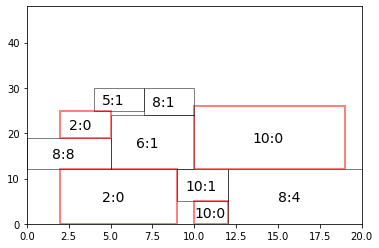

<Figure size 432x288 with 0 Axes>

In [97]:
x1 = []
y1 = []
w1 = []
h1 = []
p1 = []
number = []
for i in range(1,len(res1)):
    x1.append(res1[i][0])
    y1.append(res1[i][1])
    w1.append(res1[i][2])
    h1.append(res1[i][3])
    p1.append(res1[i][4])
    number.append(res1[i][5])
sketch_map(20, w1, h1, x1, y1, p1, p1, '1')

In [84]:
res2, ans2 = ffdtwo_withswap(ww,hh,20,pp,0.3)

In [85]:
res2 # 26 32 9.6

[[0, 0, 0, 0, 0],
 [18, 0, 2, 5, 10, 0],
 [7, 0, 3, 6, 8, 2],
 [7, 6, 3, 5, 5, 8],
 [0, 0, 7, 12, 2, 1],
 [10, 0, 8, 12, 8, 3],
 [1, 12, 5, 7, 8, 6],
 [6, 12, 5, 12, 6, 5],
 [0, 19, 3, 6, 2, 9],
 [11, 12, 9, 14, 10, 4],
 [3, 19, 3, 7, 10, 7]]

In [86]:
ans2

35.6

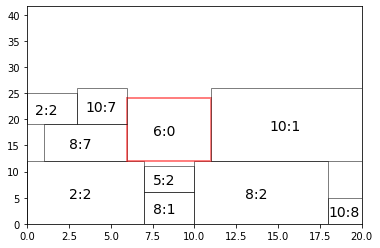

<Figure size 432x288 with 0 Axes>

In [98]:
x2 = []
y2 = []
w2 = []
h2 = []
p2 = []
number = []
for i in range(1,len(res1)):
    x2.append(res2[i][0])
    y2.append(res2[i][1])
    w2.append(res2[i][2])
    h2.append(res2[i][3])
    p2.append(res2[i][4])
    number.append(res2[i][5])
sketch_map(20, w2, h2, x2, y2, p2, p2, '1')

In [112]:
res3, ans3 = ffd_beamsearch_withswap(ww,hh,20,pp,0.3)

In [113]:
res3

[[0, 0, 0, 0, 0, 13],
 [10, 0, 2, 5, 10],
 [12, 0, 8, 12, 8],
 [2, 0, 7, 12, 2],
 [9, 5, 3, 7, 10],
 [1, 12, 5, 7, 8],
 [6, 12, 5, 12, 6],
 [2, 19, 3, 6, 2],
 [11, 12, 9, 14, 10],
 [5, 24, 3, 5, 5],
 [8, 24, 3, 6, 8]]

In [114]:
ans3 # 26 25 7.5

33.9

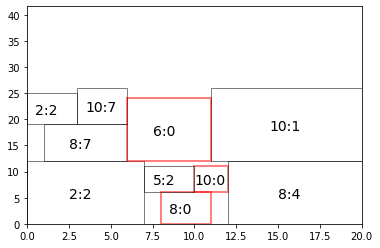

<Figure size 432x288 with 0 Axes>

In [100]:
x3 = []
y3 = []
w3 = []
h3 = []
p3 = []
number = []
for i in range(1,len(res1)):
    x3.append(res3[i][0])
    y3.append(res3[i][1])
    w3.append(res3[i][2])
    h3.append(res3[i][3])
    p3.append(res3[i][4])
    # number.append(res3[i][5])
sketch_map(20, w3, h3, x3, y3, p3, p3, '1')

In [ ]:
------------------------------

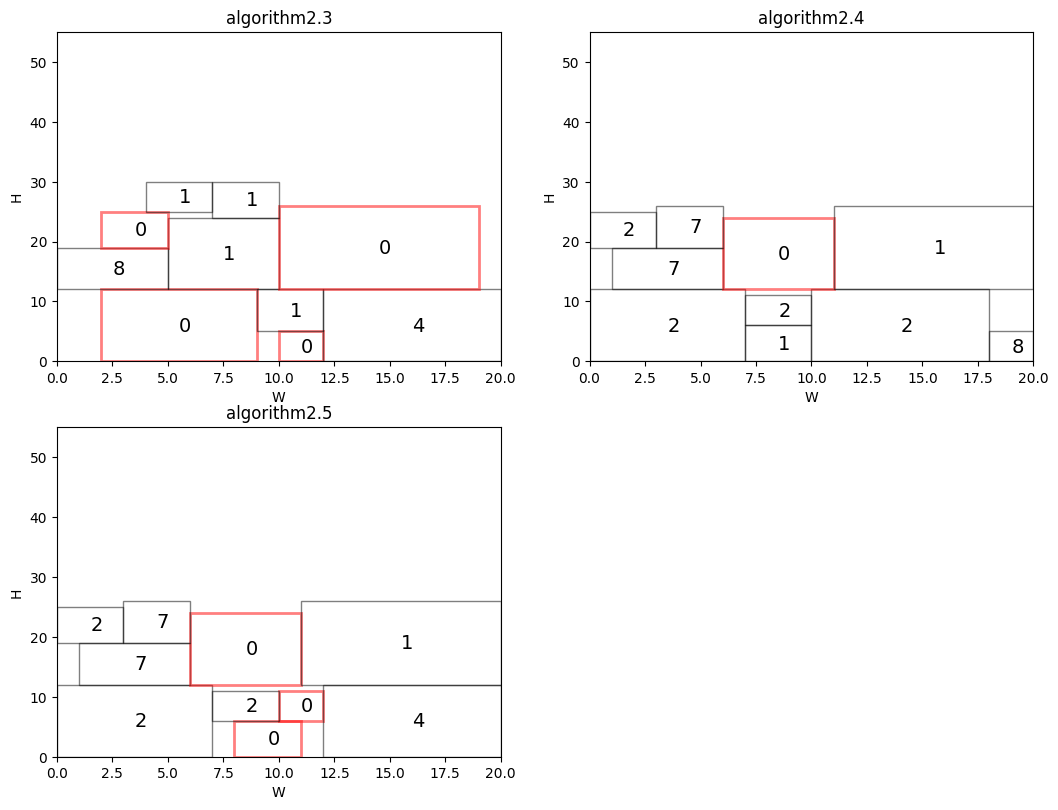

In [105]:
W = 20
w = ww
h = hh
p = pp
y_label_range = 55
x_label_range = W

# 开始做图
fig = plt.figure(figsize = [12.6, 9.6], dpi = 100)
ax = plt.subplot(221)

#建立矩形
for i in range(len(w)):
    if x1[i] == p1[i]:
        c = 'red'
        l = 2
    else:
        c = 'black'
        l = 1
    rect = plt.Rectangle(
            (x1[i], y1[i]),  # (x,y)矩形左下角
            w1[i],          # width长
            h1[i],          # height宽
            fill=False,
                          edgecolor=c, linewidth=l, 
            alpha=0.5)
    ax.add_patch(rect)
    ax.text((2 * x1[i] + w1[i])/2, (2 * y1[i] + h1[i])/2 - 1,
            str(abs(p1[i] - x1[i])),
            bbox=dict(facecolor='blue', alpha=0),
            fontsize=14, color='black')
# 建立图
plt.xlabel("W")
plt.ylabel("H")
plt.xlim(0, x_label_range)
plt.ylim(0, y_label_range)
ax.set_title("algorithm2.3")

#fig = plt.figure(figsize = [12.6, 9.6], dpi = 100)
ax = plt.subplot(222)

#建立矩形
for i in range(len(w)):
    if x2[i] == p2[i]:
        c = 'red'
        l = 2
    else:
        c = 'black'
        l = 1
    rect = plt.Rectangle(
            (x2[i], y2[i]),  # (x,y)矩形左下角
            w2[i],          # width长
            h2[i],          # height宽
            fill=False,
                          edgecolor=c, linewidth=l, 
            alpha=0.5)
    ax.add_patch(rect)
    ax.text((2 * x2[i] + w2[i])/2, (2 * y2[i] + h2[i])/2 - 1,
            str(abs(p2[i] - x2[i])),
            bbox=dict(facecolor='blue', alpha=0),
            fontsize=14, color='black')
# 建立图
plt.xlabel("W")
plt.ylabel("H")
plt.xlim(0, x_label_range)
plt.ylim(0, y_label_range)
ax.set_title("algorithm2.4")

ax = plt.subplot(223)

#建立矩形
for i in range(len(w)):
    if x3[i] == p3[i]:
        c = 'red'
        l = 2
    else:
        c = 'black'
        l = 1
    rect = plt.Rectangle(
            (x3[i], y3[i]),  # (x,y)矩形左下角
            w3[i],          # width长
            h3[i],          # height宽
            fill=False,
                          edgecolor=c, linewidth=l, 
            alpha=0.5)
    ax.add_patch(rect)
    ax.text((2 * x3[i] + w3[i])/2, (2 * y3[i] + h3[i])/2 - 1,
            str(abs(p3[i] - x3[i])),
            bbox=dict(facecolor='blue', alpha=0),
            fontsize=14, color='black')
# 建立图
plt.xlabel("W")
plt.ylabel("H")
plt.xlim(0, x_label_range)
plt.ylim(0, y_label_range)
ax.set_title("algorithm2.5")

plt.savefig('三种启发式算法对比'+ ".jpg",dpi = 200)
plt.show()

In [537]:
res2 = ffdtwo(ww,hh,20,pp)

In [535]:
res1 = ffd(ww,hh,20,pp)

In [536]:
res1

[[0, 0, 0, 0, 0],
 [0, 0, 2, 5, 10, 9],
 [2, 0, 8, 12, 8, 1],
 [10, 0, 9, 14, 10, 0],
 [14, 14, 5, 7, 8, 4],
 [2, 12, 7, 12, 2, 2],
 [9, 14, 5, 12, 6, 3],
 [17, 21, 3, 6, 2, 6],
 [14, 21, 3, 7, 10, 5],
 [3, 24, 3, 5, 5, 8],
 [6, 24, 3, 6, 8, 7]]

In [538]:
res2

[[0, 0, 0, 0, 0],
 [0, 0, 3, 7, 10, 5],
 [3, 0, 8, 12, 8, 1],
 [0, 7, 3, 5, 5, 8],
 [11, 0, 9, 14, 10, 0],
 [17, 14, 3, 6, 2, 6],
 [12, 14, 5, 7, 8, 4],
 [0, 12, 7, 12, 2, 2],
 [7, 14, 5, 12, 6, 3],
 [17, 20, 3, 6, 8, 7],
 [12, 21, 2, 5, 10, 9]]

In [542]:
res3

[[0, 0, 0, 0, 0, 54],
 [0, 0, 3, 7, 10],
 [3, 0, 8, 12, 8],
 [0, 7, 3, 5, 5],
 [11, 0, 9, 14, 10],
 [17, 14, 3, 6, 2],
 [12, 14, 5, 7, 8],
 [0, 12, 7, 12, 2],
 [7, 14, 5, 12, 6],
 [17, 20, 3, 6, 8],
 [12, 21, 2, 5, 10]]

In [541]:
res3 = ffd_beamsearch(ww, hh, 20, pp ,0)

In [540]:
def ffd_beamsearch(w, h, W, p, alpha):
    """
    带有beam_search版本的启发式算法，从三个里面选？
    w:list of width
    h:list of height
    W:width
    p:偏好位置
    """
    n = len(w)    # 箱子总数
    # beam_ans = []
    ans = [[0, 0, 0, 0, 0, 0]]      # 保存[[xi,yi,wi,hi],...]    需要排好序,以yi排序升序 第一个最后一位保存一个打分函数
    beam_ans = [ans]
    for i in range(n):
        # 开始安排第i个箱子
        tmp_h = h[i]
        tmp_w = w[i]
        tmp_p = p[i]
        tmp_beam_ans = []
        for tmp_ans in beam_ans:
            # 除了改变tmp_ans，还需要新加几个
            tmp_intervals, tmp_y= find_position(tmp_ans,tmp_w,tmp_h,W)
            # tmp_intervals为可用的区间，下面决定三种不同的策略
            # 先考虑放在最近的点
            tmp_xx = set()  #将tmp_x保存在这里面
            tmp_x = tmp_intervals[0][0]
            for j in tmp_intervals:
                if p[i] >= j[0] and p[i] <= j[1]:
                    tmp_x = p[i]
                    break
                elif abs(tmp_x - p[i]) > abs(j[0] - p[i]):
                    tmp_x = j[0]
                elif abs(tmp_x - p[i]) > abs(j[1] - p[i]):
                    tmp_x = j[1]
            tmp_xx.add(tmp_x)
            # 第二种
            tmp_x = tmp_intervals[0][0]
            for j in tmp_intervals:
            # if p[i] >= j[0] and p[i] <= j[1]:
            #     tmp_x = p[i]
            #     break
                if abs(tmp_x - p[i]) > abs(j[0] - p[i]):
                    tmp_x = j[0]
                elif abs(tmp_x - p[i]) > abs(j[1] - p[i]):
                    tmp_x = j[1]
            tmp_xx.add(tmp_x)
            # 第三种
            tmp_x = tmp_intervals[0][0]
            if abs(tmp_intervals[0][0] - p[i]) >= abs(tmp_intervals[-1][1] - p[i]):
                tmp_x = tmp_intervals[-1][1]
            tmp_xx.add(tmp_x)
            # 此时tmp_xx中保存的是可能的x坐标
            for tmp_x in tmp_xx:
                # 对三种分别进行添加
                ttmp_ans = [tmp_x, tmp_y, tmp_w, tmp_h, tmp_p]
                tmpppp_ans = copy.deepcopy(tmp_ans)
                for k in range(len(tmpppp_ans)):
                    if tmpppp_ans[k][1] + tmpppp_ans[k][3] > tmp_y + tmp_h:
                        tmpppp_ans = tmpppp_ans[:k] + [ttmp_ans] + tmpppp_ans[k:]
                        break
                if len(tmpppp_ans) != i + 2:
                    tmpppp_ans.append(ttmp_ans)
                tmpppp_ans[0][5] += abs(tmp_x - tmp_p)
                tmp_beam_ans.append(tmpppp_ans)
        # tmp_beam_ans中取出前k个s
        tmp_beam_ans.sort(key = lambda x : alpha * x[0][-1] + x[-1][1] + x[-1][3])
        beam_ans = tmp_beam_ans[:10]
    return beam_ans[0]

IndexError: list index out of range

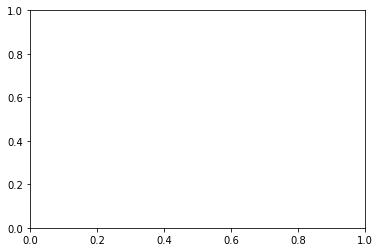

In [474]:
x = []
y = []
w = []
h = []
p = []
number = []
for i in range(1,len(res1)):
    x.append(res1[i][0])
    y.append(res1[i][1])
    w.append(res1[i][2])
    h.append(res1[i][3])
    p.append(res1[i][4])
    #number.append(res1[i][5])
sketch_map(20, w, h, x, y, p, number, '1')

In [532]:
punish = 0
for i in res1:
    punish += abs(i[0] - i[4])
punish

4

In [533]:
res1

[[0, 0, 0, 0, 0],
 [2, 0, 7, 13, 2, 0],
 [11, 0, 7, 13, 11, 1],
 [17, 13, 3, 4, 17, 3],
 [5, 13, 3, 4, 9, 4],
 [8, 13, 5, 8, 8, 2]]

In [461]:
res2

[[0, 0, 0, 0, 0],
 [0, 0, 3, 7, 10, 5],
 [3, 0, 8, 12, 8, 1],
 [0, 7, 3, 5, 5, 8],
 [11, 0, 9, 14, 10, 0],
 [17, 14, 3, 6, 2, 6],
 [12, 14, 5, 7, 8, 4],
 [0, 12, 7, 12, 2, 2],
 [7, 14, 5, 12, 6, 3],
 [17, 20, 3, 6, 8, 7],
 [12, 21, 2, 5, 10, 9]]

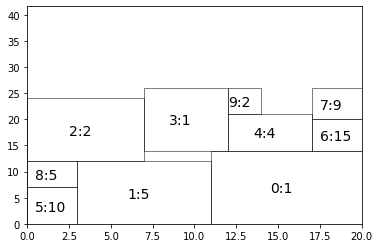

<Figure size 432x288 with 0 Axes>

In [462]:
x = []
y = []
w = []
h = []
p = []
number = []
for i in range(1,len(res1)):
    x.append(res2[i][0])
    y.append(res2[i][1])
    w.append(res2[i][2])
    h.append(res2[i][3])
    p.append(res2[i][4])
    number.append(res2[i][5])
sketch_map(20, w, h, x, y, p, number, '1')

In [531]:
{0: 4.109798259365179, 0.1: 6.5089709463184136, 0.2: 8.914534002456804, 0.3: 10.005533822346228, 0.4: 9.810904158690077, 0.5: 10.62096094090756, 1: 13.40295703261437, 1.5: 19.469759484084683, 2: 28.03198938256012, 3: 50.565464523646455}
{0: 2.141003806376687, 0.1: 6.27729265421663, 0.2: 9.255595576797198, 0.3: 10.115781545644348, 0.4: 14.1639903296219, 0.5: 15.692325852974967, 1: 25.28940437077891, 1.5: 37.607416707333584, 2: 53.900956085944, 3: 94.4065520565697}
{0: 1.4590566158294678, 0.1: 1.791015625, 0.2: 2.050504446029663, 0.3: 2.0651235580444336, 0.4: 1.8578910827636719, 0.5: 1.543222188949585, 1: 1.9156270027160645, 1.5: 2.068485736846924, 2: 2.054299831390381, 3: 1.8250200748443604}
{0: 1.719897747039795, 0.1: 1.9075493812561035, 0.2: 1.9671356678009033, 0.3: 1.8225042819976807, 0.4: 1.5801920890808105, 0.5: 1.6325852870941162, 1: 1.9047398567199707, 1.5: 1.955998420715332, 2: 1.859654188156128, 3: 1.6349594593048096}
{0: 37.80499053001404, 0.1: 169.68221282958984, 0.2: 229.34224271774292, 0.3: 308.00049090385437, 0.4: 536.6642832756042, 0.5: 267.7123508453369, 1: 265.2602469921112, 1.5: 345.0060167312622, 2: 233.84611296653748, 3: 203.35484051704407}

{0: 37.80499053001404,
 0.1: 169.68221282958984,
 0.2: 229.34224271774292,
 0.3: 308.00049090385437,
 0.4: 536.6642832756042,
 0.5: 267.7123508453369,
 1: 265.2602469921112,
 1.5: 345.0060167312622,
 2: 233.84611296653748,
 3: 203.35484051704407}

In [413]:
x

[0, 2, 10, 14, 2, 9, 17, 14, 3, 6]

In [460]:
res2 = ffdtwo(ww,hh,20,pp)

In [408]:
punish = 0
for i in res1:
    punish += abs(i[0] - i[4])
punish

48

In [245]:
res1

[[0, 0, 0, 0, 0],
 [13, 0, 2, 5, 10],
 [2, 0, 3, 6, 2],
 [10, 0, 3, 7, 10],
 [15, 0, 5, 7, 8],
 [2, 6, 3, 5, 5],
 [5, 0, 5, 12, 6],
 [10, 7, 8, 12, 8],
 [2, 12, 7, 12, 2],
 [7, 24, 3, 6, 8],
 [10, 19, 9, 14, 10]]

In [469]:
res1 = ha.ffd(w,h,20,p)

In [470]:
res1

[[0, 0, 0, 0, 0],
 [2, 0, 7, 13, 2],
 [11, 0, 7, 13, 11],
 [17, 13, 3, 4, 17],
 [8, 13, 5, 8, 8]]

In [471]:
punish = 0
for i in res1:
    punish += abs(i[0] - i[4])

In [472]:
punish

0

In [163]:
res2 = ha.ffdtwo(ww,hh,20,pp)

In [164]:
res2

[[0, 0, 0, 0, 0],
 [0, 0, 3, 7, 10],
 [3, 0, 8, 12, 8],
 [0, 7, 3, 5, 5],
 [11, 0, 9, 14, 10],
 [17, 14, 3, 6, 2],
 [12, 14, 5, 7, 8],
 [0, 12, 7, 12, 2],
 [7, 14, 5, 12, 6],
 [17, 20, 3, 6, 8],
 [12, 21, 2, 5, 10]]

In [409]:
punish = 0
for i in res2:
    punish += abs(i[0] - i[4])

In [410]:
punish # 在小\alpha中表现挺好

54

In [170]:
ha.ffd_beamsearch(ww,hh,20,pp,2)

[[0, 0, 0, 0, 0, 47],
 [0, 0, 2, 5, 10],
 [2, 0, 8, 12, 8],
 [10, 0, 9, 14, 10],
 [0, 12, 3, 7, 10],
 [15, 14, 5, 7, 8],
 [3, 12, 7, 12, 2],
 [0, 19, 3, 6, 2],
 [10, 14, 5, 12, 6],
 [15, 21, 3, 6, 8],
 [5, 24, 3, 5, 5]]

In [111]:
res

[[0, 0, 0, 0, 0],
 [10, 0, 2, 5, 10],
 [5, 0, 3, 5, 5],
 [12, 0, 3, 6, 8],
 [2, 0, 3, 6, 2],
 [15, 0, 3, 7, 10],
 [7, 5, 5, 7, 8],
 [2, 6, 5, 12, 6],
 [12, 7, 7, 12, 2],
 [4, 18, 8, 12, 8],
 [10, 30, 9, 14, 10]]

In [13]:
punish

44

In [7]:
ha.ffdthree(ww,hh,20,pp)

[[0, 0, 0, 0, 0],
 [18, 0, 2, 5, 10],
 [0, 0, 3, 5, 5],
 [3, 0, 3, 6, 8],
 [6, 0, 3, 6, 2],
 [9, 0, 3, 7, 10],
 [12, 0, 5, 7, 8],
 [4, 6, 5, 12, 6],
 [9, 7, 7, 12, 2],
 [1, 18, 8, 12, 8],
 [11, 19, 9, 14, 10]]

In [37]:
ree = ha.ffd_beamsearch(ww,hh,20,pp,20000)

In [38]:
ree

[[0, 0, 0, 0, 0, 28],
 [10, 0, 2, 5, 10],
 [5, 0, 3, 5, 5],
 [12, 0, 3, 6, 8],
 [2, 0, 3, 6, 2],
 [15, 0, 3, 7, 10],
 [7, 5, 5, 7, 8],
 [2, 6, 5, 12, 6],
 [12, 7, 7, 12, 2],
 [4, 18, 8, 12, 8],
 [10, 30, 9, 14, 10]]

In [33]:
punish = 0
for i in ree:
    punish += abs(i[0] - i[4])

In [34]:
punish

28

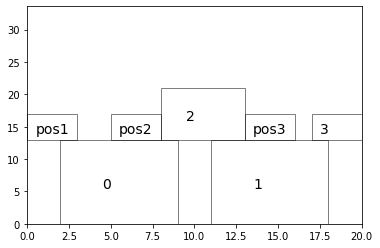

In [96]:
x = [2, 11, 8, 17]
y = [0, 0, 13, 13]
w = [7, 7, 5, 3]
h = [13, 13, 8, 4]
p = [2, 11, 8, 17]
y_label_range = 1.6 * max([i + j for i, j in zip(y, h)])
x_label_range = 20

# 开始做图
fig = plt.figure()
ax = fig.add_subplot(111)

#建立矩形
for i in range(len(x)):
    
    c = 'black'
    l = 1
    rect = plt.Rectangle(
            (x[i], y[i]),  # (x,y)矩形左下角
            w[i],          # width长
            h[i],          # height宽
            fill=False,
                          edgecolor=c, linewidth=l, 
            alpha=0.5)
    ax.add_patch(rect)
    ax.text((2 * x[i] + w[i])/2 - 1, (2 * y[i] + h[i])/2 - 1,
            str(i) ,
            bbox=dict(facecolor='blue', alpha=0),
            fontsize=14, color='black')
# 建立图
c = 'black'
l = 1
rect = plt.Rectangle(
            (0, 13),  # (x,y)矩形左下角
            3,          # width长
            4,          # height宽
            fill=False,
                          edgecolor=c, linewidth=l, 
            alpha=0.5)
ax.add_patch(rect)
ax.text((2 * 0 + 3)/2 - 1, (2 * 13 + 4)/2 - 1,
            "pos1",
            bbox=dict(facecolor='blue', alpha=0),
            fontsize=14, color='black')
rect = plt.Rectangle(
            (5, 13),  # (x,y)矩形左下角
            3,          # width长
            4,          # height宽
            fill=False,
                          edgecolor=c, linewidth=l, 
            alpha=0.5)
ax.add_patch(rect)
ax.text((2 * 5 + 3)/2 - 1, (2 * 13 + 4)/2 - 1,
            "pos2",
            bbox=dict(facecolor='blue', alpha=0),
            fontsize=14, color='black')
rect = plt.Rectangle(
            (13, 13),  # (x,y)矩形左下角
            3,          # width长
            4,          # height宽
            fill=False,
                          edgecolor=c, linewidth=l, 
            alpha=0.5)
ax.add_patch(rect)
ax.text((2 * 13 + 3)/2 - 1, (2 * 13 + 4)/2 - 1,
            "pos3",
            bbox=dict(facecolor='blue', alpha=0),
            fontsize=14, color='black')
plt.xlim(0, x_label_range)
plt.ylim(0, y_label_range)

plt.savefig("启发式算法示意图" + ".jpg",dpi = 200)
plt.show()

In [509]:
w

[7, 7, 5, 3]

In [510]:
w.append(3)
h.append(4)


In [511]:
p.append(9)

In [505]:
p[-1] = 9

In [512]:
res1 = ffd(w,h,20,p)

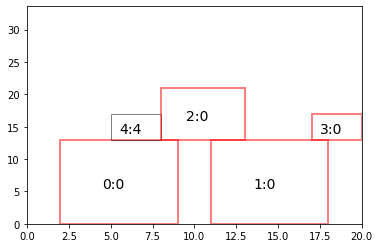

<Figure size 432x288 with 0 Axes>

In [513]:
x = []
y = []
w = []
h = []
p = []
number = []
for i in range(1,len(res1)):
    x.append(res1[i][0])
    y.append(res1[i][1])
    w.append(res1[i][2])
    h.append(res1[i][3])
    p.append(res1[i][4])
    number.append(res1[i][5])
sketch_map(20, w, h, x, y, p, number, '1')

In [480]:
res1

[[0, 0, 0, 0, 0],
 [2, 0, 7, 13, 2],
 [11, 0, 7, 13, 11],
 [17, 13, 3, 4, 17],
 [8, 13, 5, 8, 8]]

In [522]:
w = {}
h = {}
p = {}
n_small = n // 3
n_mid = n //3
n_large = n - n_small - n_mid
tmp_w = []
tmp_h = []
for i in range(1, n_small + 1):
    tmp_w.append(random.randint(1, 3))
    tmp_h.append(random.randint(3, 6))
tmp_w.sort()
tmp_h.sort()
#ww = ww[::-1]
#hh = hh[::-1]
for i in range(1, n_small + 1):
    w[i] = tmp_w[i - 1]
    h[i] = tmp_h[i - 1]
    p[i] = random.randint(0, 20 - w[i])
tmp_w = []
tmp_h = []
for i in range(n_small + 1, n_small + n_mid + 1):
    tmp_w.append(random.randint(4, 6))
    tmp_h.append(random.randint(7, 10))
tmp_w.sort()
tmp_h.sort()
#ww = ww[::-1]
#hh = hh[::-1]
for i in range(n_small + 1, n_small + n_mid + 1):
    w[i] = tmp_w[i - n_small - 1]
    h[i] = tmp_h[i - n_small - 1]
    p[i] = random.randint(0, 20 - w[i])
tmp_w = []
tmp_h = []
for i in range(n_small + n_mid + 1, n + 1):
    tmp_w.append(random.randint(7, 9))
    tmp_h.append(random.randint(11, 14))
tmp_w.sort()
tmp_h.sort()
#ww = ww[::-1]
#hh = hh[::-1]
for i in range(n_small + n_mid + 1, n + 1):
    w[i] = tmp_w[i - n_small - n_mid - 1]
    h[i] = tmp_h[i - n_small - n_mid - 1]
    p[i] = random.randint(0, 20 - w[i])

In [529]:
ww = list(w.values())

In [530]:
ww

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 9]